In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

df = pd.read_csv('diabetes_prediction_dataset.csv')[:500]
df['gender'].replace(['Female','Male', 'Other'],[0,1, np.nan],inplace=True)
df.drop(columns=['smoking_history'],inplace=True)
df.dropna(inplace=True)
#df = pd.get_dummies(df, columns = ['gender'])
vMin = df.min( axis = 0 )
x = (df - vMin) / (df.max( axis = 0 ) - vMin)

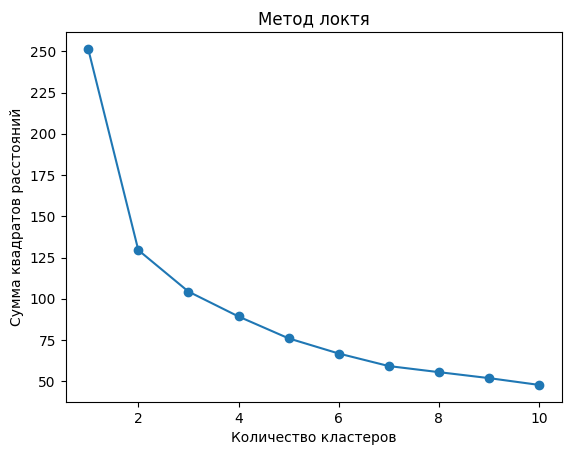

In [3]:
X =  np.array( x.iloc[:,:-1] )#.reshape(-1,11)
Y =  np.array( x.iloc[:,-1] )
# список для сохранения значений инерции
inertia_values = []

# Перебираем разное количество кластеров
for k in range(1, 11):
    # объект KMeans с текущим количеством кластеров
    kmeans = KMeans( n_clusters = k, random_state = 42)
    kmeans.fit( X )
    # Сохраняем значение инерции - мерой компактности кластеров. 
    # Он вычисляется как сумма квадратов расстояний между каждым объектом данных и центроидом  
    inertia_values.append( kmeans.inertia_ )

plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Метод локтя')
plt.show()

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans( n_clusters = 2, random_state = 2 )

# Производим кластеризацию данных
kmeans.fit( X )

# метки кластеров для каждого объекта
labels = kmeans.labels_

centroids = kmeans.cluster_centers_
# X - данные
# labels - метки кластеров
silhouette_avg = silhouette_score(X, labels)
print("Средний индекс силуэта (от -1 (плохо) до 1(хорошо) ):", silhouette_avg)

# X - данные
# labels - метки кластеров
db_index = davies_bouldin_score(X, labels)
print("Коэффициент Дэвиcа-Болдуина (от 0 до 1. Чем меньше, тем лучше):", db_index)

# ARI - сравнение разюиений на кластеры и существующей классификации (true labels)
ari = adjusted_rand_score(Y, labels)
print("Средний индекс ARI (от -1 (плохо) до 1(хорошо) ):", ari)


Средний индекс силуэта (от -1 (плохо) до 1(хорошо) ): 0.4845869400100714
Коэффициент Дэвиcа-Болдуина (от 0 до 1. Чем меньше, тем лучше): 0.8959977596289004
Средний индекс ARI (от -1 (плохо) до 1(хорошо) ): 0.004768290925788017


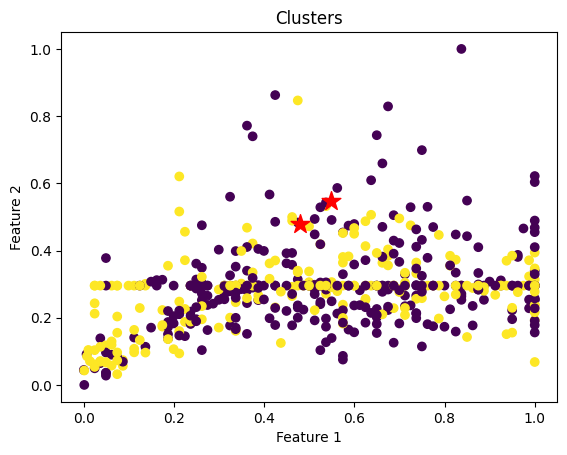

In [5]:
# Выбор двух показательных параметров для визуализации
feature1 = X[:, 1]
feature2 = X[:, 4]

# Визуализация сечений
plt.scatter(feature1, feature2, c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1], marker='*', c='red', s=200)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters')
plt.show()

Text(0.5, 1.0, 'Кластеризация\n')

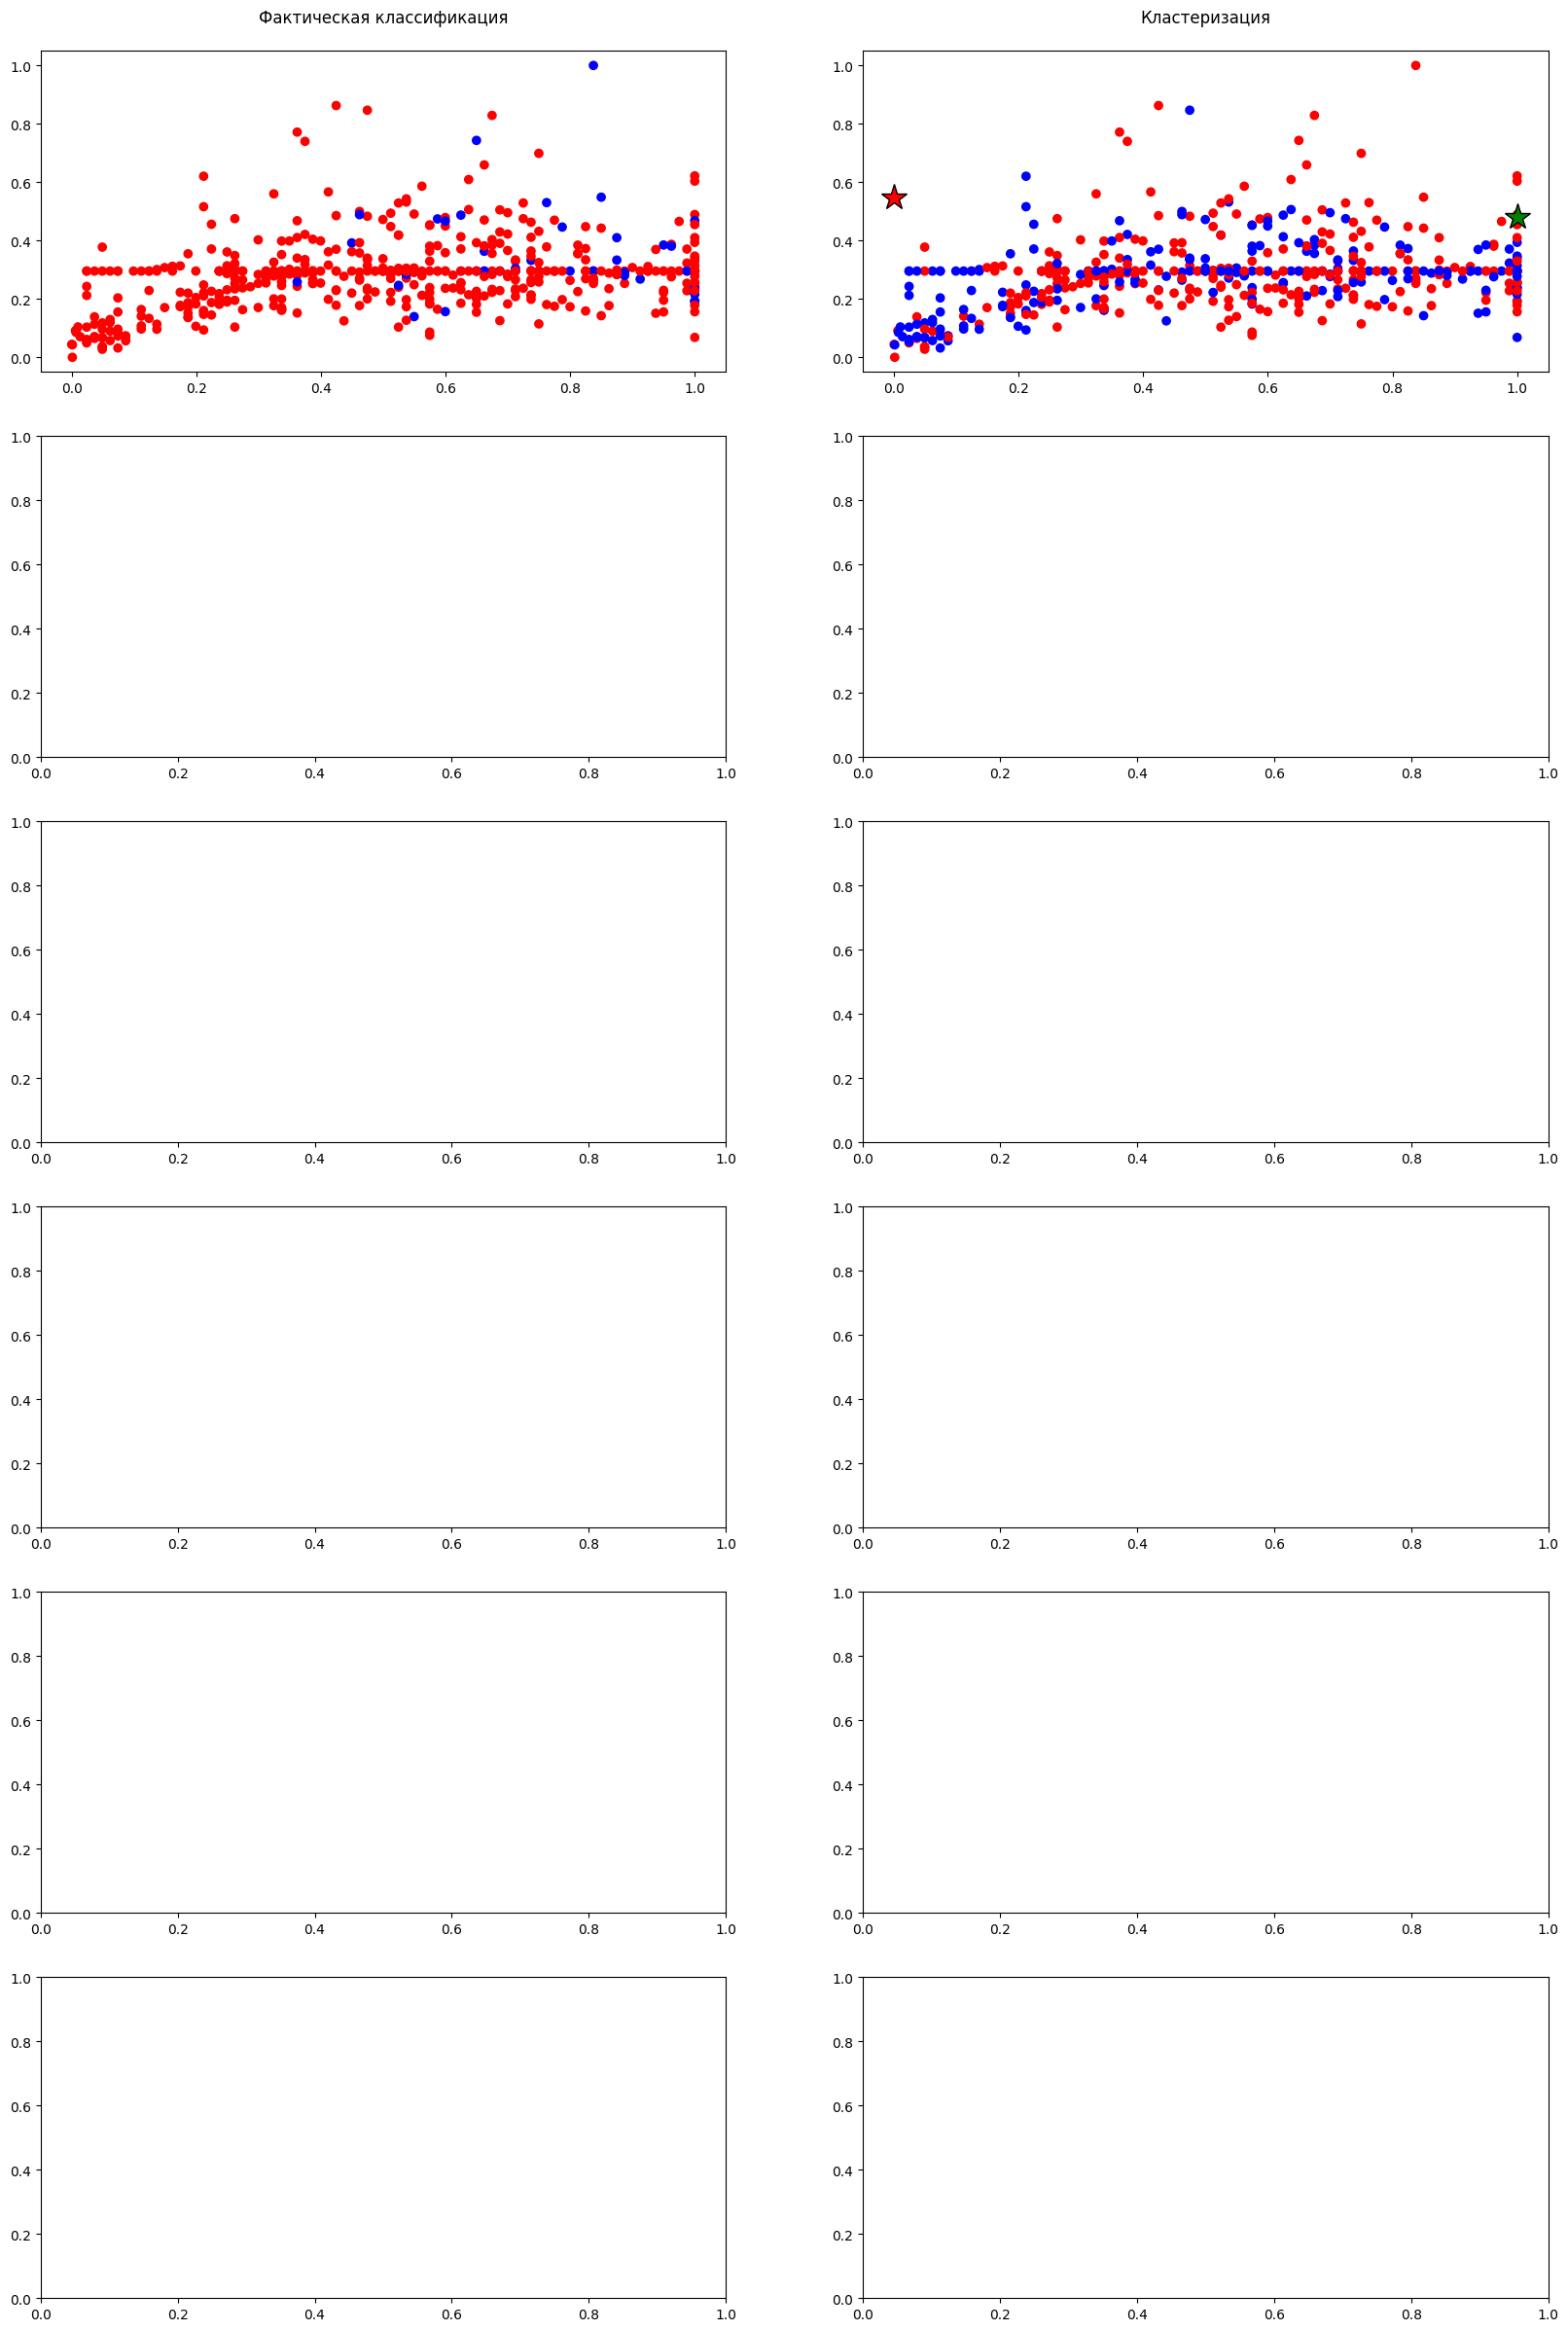

In [7]:
colorMap = ListedColormap(["red", "green","blue"])

fig, axs = plt.subplots(6,2, figsize = (20,30))

#слева график фактической классификации по параметрам 0 и 1
axs[0,0].scatter(X[:,1], X[:,4], c = Y, cmap = colorMap )
axs[0,0].set_title("Фактическая классификация\n")

#справа - график с кластеризацией данных по параметрам 0 и 1
axs[0,1].scatter(X[:,1], X[:,4], c = labels, cmap = colorMap )
#отображаем центроиды по свойствам 0 и 1
axs[0,1].plot(centroids[0,0], centroids[0,1], color = colorMap.colors[0], marker = "*", markersize = 20, markeredgecolor = "k")
axs[0,1].plot(centroids[1,0], centroids[1,1], color = colorMap.colors[1], marker = "*", markersize = 20, markeredgecolor = "k")
#axs[0,1].plot(centroids[2,0], centroids[2,1], color = colorMap.colors[2], marker = "*", markersize = 20, markeredgecolor = "k")
axs[0,1].set_title("Кластеризация\n")